#

In [1]:
%load_ext autoreload
%autoreload 2
from system_development.strategies.trend_pullback_v1.run_backtest import run_backtest_for_default_universe
from system_development.strategies.trend_pullback_v1.config import StrategyParams


=== Running backtest for ^GSPC ===

Signal counts for ^GSPC:
Signal
0    3145
1     227
Name: count, dtype: int64

Exit breakdown for ^GSPC:
  All trades       :  116 trades, avg holding   0.63 days
  tp            :   17 trades, avg holding   1.21 days
  trend_exit    :   56 trades, avg holding   0.21 days
  stop          :   43 trades, avg holding   0.93 days


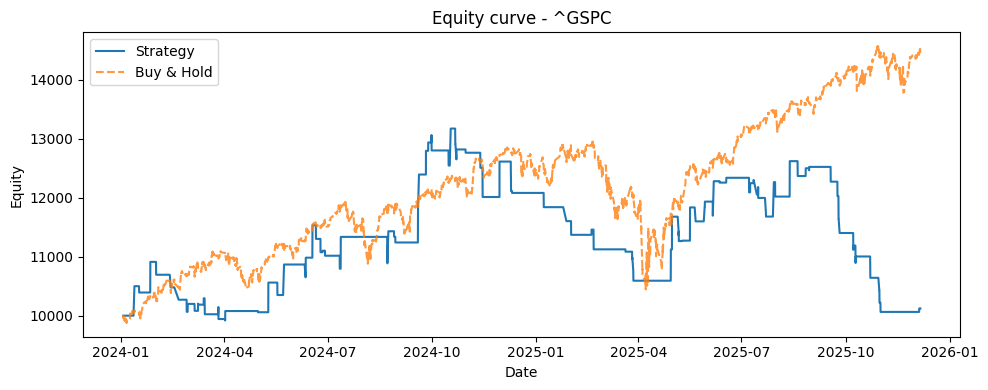


=== Running backtest for ^NDX ===

Signal counts for ^NDX:
Signal
0    3130
1     242
Name: count, dtype: int64

Exit breakdown for ^NDX:
  All trades       :  119 trades, avg holding   0.60 days
  tp            :   19 trades, avg holding   1.13 days
  stop          :   46 trades, avg holding   0.82 days
  trend_exit    :   54 trades, avg holding   0.23 days


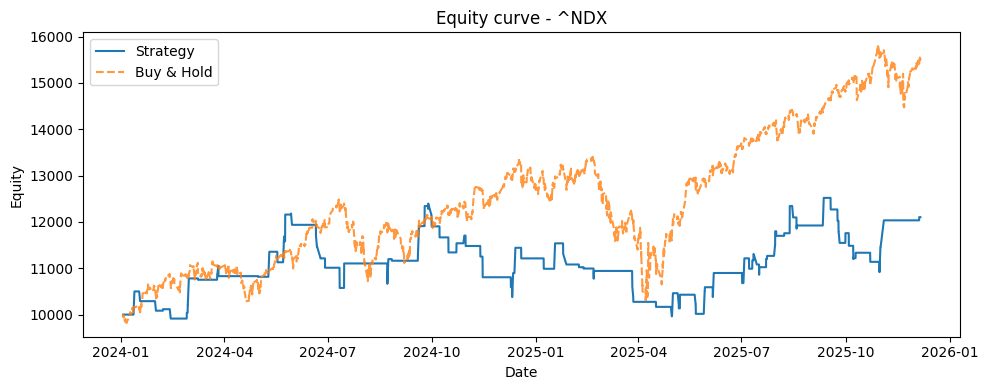


=== Running backtest for ^FTSE ===

Signal counts for ^FTSE:
Signal
0    4099
1     306
Name: count, dtype: int64

Exit breakdown for ^FTSE:
  All trades       :  128 trades, avg holding   0.66 days
  tp            :   20 trades, avg holding   2.01 days
  stop          :   48 trades, avg holding   0.58 days
  trend_exit    :   60 trades, avg holding   0.28 days


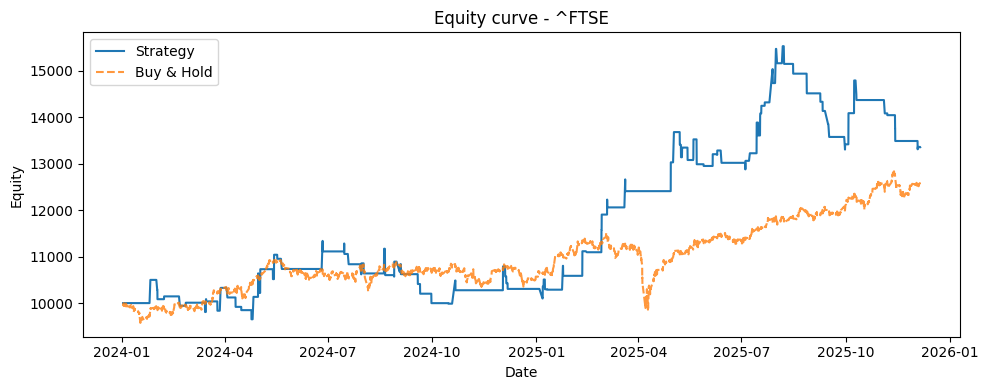


=== Running backtest for EURUSD=X ===

Signal counts for EURUSD=X:
Signal
 0    10562
 1      725
-1      675
Name: count, dtype: int64

Exit breakdown for EURUSD=X:
  All trades       :  614 trades, avg holding   0.20 days
  tp            :  100 trades, avg holding   0.33 days
  stop          :  219 trades, avg holding   0.22 days
  trend_exit    :  295 trades, avg holding   0.13 days


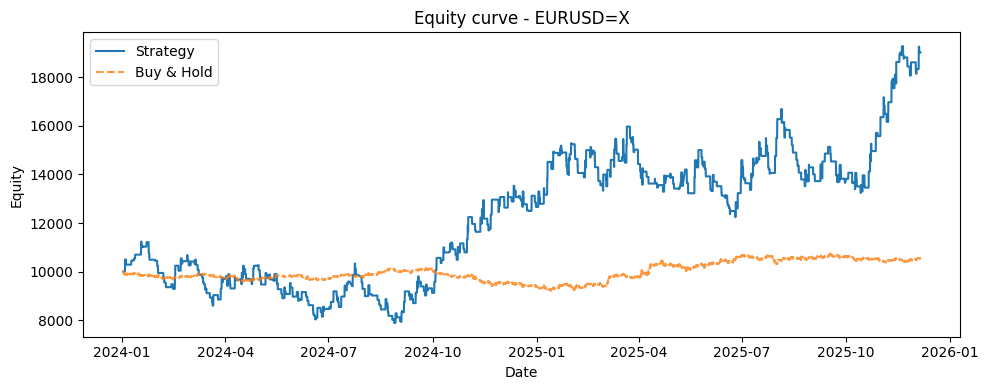


=== Backtest statistics for PORTFOLIO_EQUAL_WEIGHT ===
start_equity        : 10000.0000
end_equity          : 19020.7396
total_return_pct    :    90.21%
max_drawdown_pct    :   -29.76%
num_trades          : 977.0000
win_rate_pct        :    38.38%
avg_win             : 323.1726
avg_loss            : -185.3677
profit_factor       :   1.1370
sharpe_ratio        :   0.8501


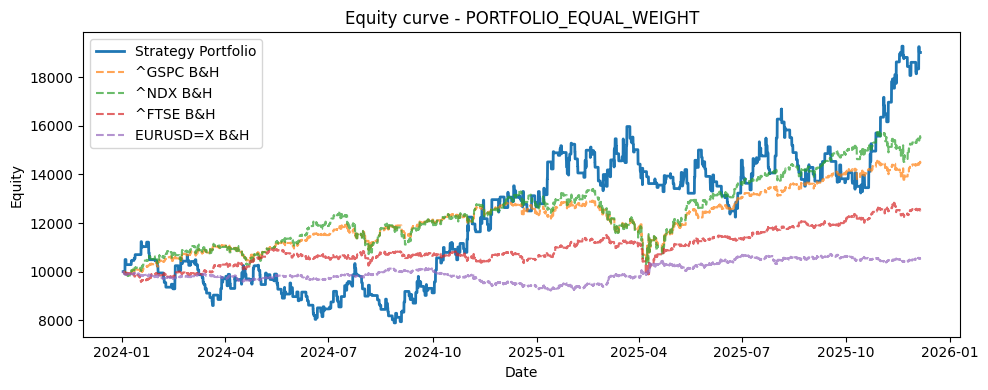


=== Backtest statistics for ^GSPC ===
start_equity        : 10000.0000
end_equity          : 10122.4539
total_return_pct    :     1.22%
max_drawdown_pct    :   -23.60%
num_trades          : 116.0000
win_rate_pct        :    38.79%
avg_win             : 281.9763
avg_loss            : -176.9927
profit_factor       :   1.0097
sharpe_ratio        :   0.2330

=== Backtest statistics for ^NDX ===
start_equity        : 10000.0000
end_equity          : 12103.5481
total_return_pct    :    21.04%
max_drawdown_pct    :   -19.62%
num_trades          : 119.0000
win_rate_pct        :    41.18%
avg_win             : 294.2488
avg_loss            : -175.9235
profit_factor       :   1.1708
sharpe_ratio        :   1.1156

=== Backtest statistics for ^FTSE ===
start_equity        : 10000.0000
end_equity          : 13356.5684
total_return_pct    :    33.57%
max_drawdown_pct    :   -14.33%
num_trades          : 128.0000
win_rate_pct        :    40.62%
avg_win             : 327.5355
avg_loss            : -1

In [2]:
if __name__ == "__main__":

    params_cash = StrategyParams(
        entry_mode="shallow_pullback",
        equity_mode="m2m",
        exit_mode="fixed_rr",
        tp_atr_mult=2.5,
        risk_per_trade=0.02,
    )

    results_cash = run_backtest_for_default_universe(
        params=params_cash,
        start="2024-1-01",
        end=None,
        interval="1h",
        plot=True,
        portfolio=True,
        show_benchmark=True,
    )



# Debug

In [ ]:
from system_development.engine.data_loader import download_price_data
from system_development.strategies.trend_pullback_v1.config import DEFAULT_PARAMS
from system_development.strategies.trend_pullback_v1.rules import prepare_dataframe

symbol = "^GSPC"

raw = download_price_data(symbol, start="2015-01-01", interval="1d")
df = prepare_dataframe(raw, DEFAULT_PARAMS)

df["Signal"].value_counts()
df[["Close", "EMA_Fast", "EMA_Slow", "RSI", "ADX", "Trend", "Signal"]].tail()
